In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import glob as gb
import keras
import shutil
import random
from shutil import copyfile
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import svm
import timeit
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
for folder in  os.listdir( 'train') : 
    files = gb.glob(pathname= str( 'train//' + folder + '/*.png'))
    print(f'For training data , found {len(files)} in folder {folder}')
#print(os.listdir(trainpath + 'train'))    

For training data , found 45 in folder obj1
For training data , found 36 in folder obj10
For training data , found 36 in folder obj100
For training data , found 36 in folder obj11
For training data , found 36 in folder obj12
For training data , found 36 in folder obj13
For training data , found 36 in folder obj14
For training data , found 36 in folder obj15
For training data , found 36 in folder obj16
For training data , found 36 in folder obj17
For training data , found 36 in folder obj18
For training data , found 36 in folder obj19
For training data , found 44 in folder obj2
For training data , found 36 in folder obj20
For training data , found 36 in folder obj21
For training data , found 36 in folder obj22
For training data , found 36 in folder obj23
For training data , found 36 in folder obj24
For training data , found 36 in folder obj25
For training data , found 36 in folder obj26
For training data , found 36 in folder obj27
For training data , found 36 in folder obj28
For trainin

In [3]:
for folder in  os.listdir('test') : 
    files = gb.glob(pathname= str('test//' + folder + '/*.png'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 36 in folder obj1
For testing data , found 36 in folder obj10
For testing data , found 36 in folder obj100
For testing data , found 36 in folder obj11
For testing data , found 36 in folder obj12
For testing data , found 36 in folder obj13
For testing data , found 36 in folder obj14
For testing data , found 36 in folder obj15
For testing data , found 36 in folder obj16
For testing data , found 36 in folder obj17
For testing data , found 36 in folder obj18
For testing data , found 36 in folder obj19
For testing data , found 36 in folder obj2
For testing data , found 36 in folder obj20
For testing data , found 36 in folder obj21
For testing data , found 36 in folder obj22
For testing data , found 36 in folder obj23
For testing data , found 36 in folder obj24
For testing data , found 36 in folder obj25
For testing data , found 36 in folder obj26
For testing data , found 36 in folder obj27
For testing data , found 36 in folder obj28
For testing data , found 36 in fo

In [4]:
files = gb.glob(pathname= str('pred/*.png'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 3595


In [5]:
for folder in  os.listdir('validate') : 
    files = gb.glob(pathname= str( 'validate//' + folder + '/*.png'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 45 in folder obj1
For testing data , found 36 in folder obj10
For testing data , found 36 in folder obj100
For testing data , found 36 in folder obj11
For testing data , found 36 in folder obj12
For testing data , found 36 in folder obj13
For testing data , found 36 in folder obj14
For testing data , found 36 in folder obj15
For testing data , found 36 in folder obj16
For testing data , found 36 in folder obj17
For testing data , found 36 in folder obj18
For testing data , found 36 in folder obj19
For testing data , found 44 in folder obj2
For testing data , found 36 in folder obj20
For testing data , found 36 in folder obj21
For testing data , found 36 in folder obj22
For testing data , found 36 in folder obj23
For testing data , found 36 in folder obj24
For testing data , found 36 in folder obj25
For testing data , found 36 in folder obj26
For testing data , found 36 in folder obj27
For testing data , found 36 in folder obj28
For testing data , found 36 in fo

In [6]:
size = []
for folder in  os.listdir('train') : 
    files = gb.glob(pathname= str( 'train//' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(128, 128, 3)    3788
dtype: int64

In [7]:
size = []
for folder in  os.listdir('test') : 
    files = gb.glob(pathname= str( 'test//' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(128, 128, 3)    3600
dtype: int64

In [8]:
size = []
files = gb.glob(pathname= str('pred/*.png'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(128, 128, 3)    3595
dtype: int64

In [9]:
size = []
for folder in  os.listdir('validate') : 
    files = gb.glob(pathname= str('validate//' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(128, 128, 3)    3752
dtype: int64

In [10]:
s=120

In [11]:
code = {'obj1':0, 'obj2':1, 'obj3':2, 'obj4':3, 'obj5':4, 'obj6':5, 'obj7':6, 'obj8':7, 'obj9':8, 'obj10':9, 'obj11':10,
                'obj12':11, 'obj13':12, 'obj14':13, 'obj15':14, 'obj16':15, 'obj17':16, 'obj18':17, 'obj19':18, 'obj20':19, 'obj21':20, 'obj22':21,
                'obj23':22,'obj24':23,'obj25':24,'obj26':25,'obj27':26,'obj28':27,'obj29':28,'obj30':29,'obj31':30,'obj32':31,'obj33':32, 
                'obj34':33, 'obj35':34,'obj36':35, 'obj37':36, 'obj38':37, 'obj39':38, 'obj40':39, 'obj41':40, 'obj42':41, 'obj43':42, 'obj44':43,
                'obj45':44, 'obj46':45,'obj47':46,'obj48':47, 'obj49':48, 'obj50':49, 'obj51':50, 'obj52':51, 'obj53':52, 'obj54':53, 
                'obj55':54, 'obj56':55, 'obj57':56, 'obj58':57, 'obj59':58, 'obj60':59, 'obj61':60, 'obj62':61, 'obj63':62, 'obj64':63, 'obj65':64, 
                'obj66':65, 'obj67':66, 'obj68':67, 'obj69':68,'obj70':69, 'obj71':70, 'obj72':71, 'obj73':72, 'obj74':73, 'obj75':74, 'obj76':75,
                'obj77':76, 'obj78':77, 'obj79':78, 'obj80':79,'obj81':80, 'obj82':81, 'obj83':82, 'obj84':83, 'obj85':84, 'obj86':85, 'obj87':86,
                'obj88':87, 'obj89':88, 'obj90':89, 'obj91':90,'obj92':91, 'obj93':92, 'obj94':93, 'obj95':94, 'obj96':95, 'obj97':96, 'obj98':97, 
                'obj99':98, 'obj100':99}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    


In [12]:
X_train = []
y_train = []
for folder in  os.listdir('train') : 
    files = gb.glob(pathname= str( 'train//' + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])#ojects labels


In [13]:
X_valid = []
y_valid = []
for folder in  os.listdir('validate') : 
    files = gb.glob(pathname= str( 'validate//' + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_valid.append(list(image_array))
        y_valid.append(code[folder])

In [14]:
X_test = []
y_test = []
for folder in  os.listdir('test') : 
    files = gb.glob(pathname= str('test//' + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [15]:
X_pred = []
files = gb.glob(pathname= str( 'pred/*.png'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))

In [16]:
print(f'we have {len(X_train)} items in X_train')

we have 3788 items in X_train


In [17]:
print(f'we have {len(X_test)} items in X_test')

we have 3600 items in X_test


In [18]:
print(f'we have {len(X_pred)} items in X_pred')

we have 3595 items in X_pred


In [19]:
print(f'we have {len(X_valid)} items in X_valid')

we have 3752 items in X_valid


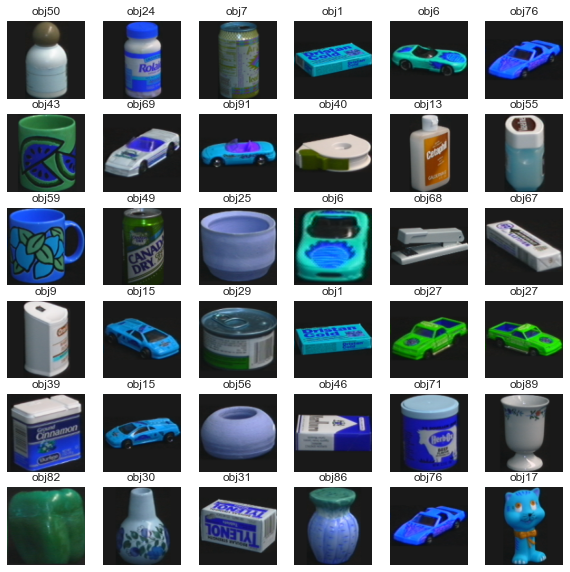

In [20]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

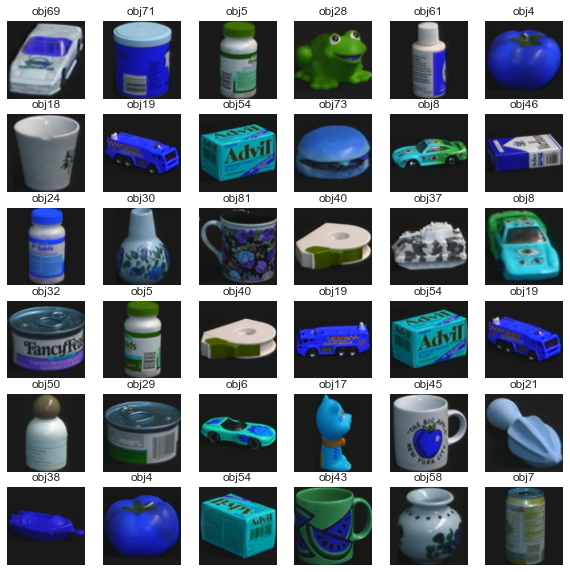

In [21]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

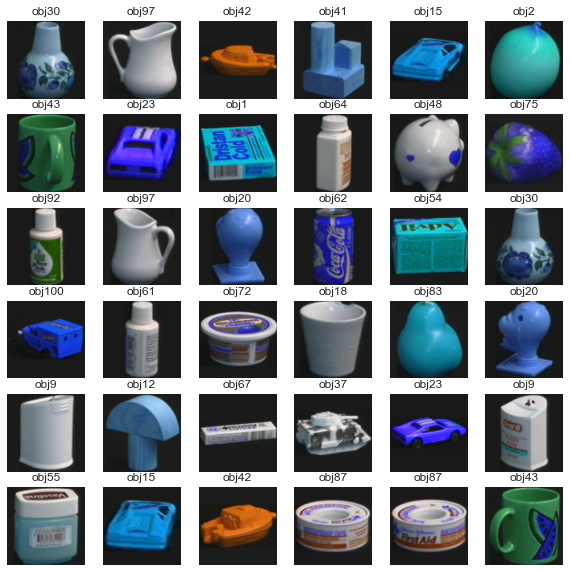

In [22]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

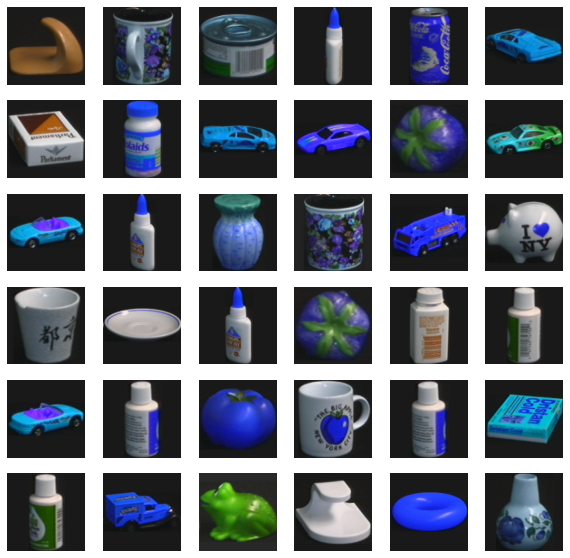

In [23]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [24]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
X_pred_array = np.asarray(X_pred)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'X_valid shape is {X_valid.shape}')
print(f'y_valid shape  is {y_valid.shape}')


X_train shape  is (3788, 120, 120, 3)
X_test shape  is (3600, 120, 120, 3)
X_pred shape  is (3595, 120, 120, 3)
y_train shape  is (3788,)
y_test shape  is (3600,)
X_valid shape is (3752, 120, 120, 3)
y_valid shape  is (3752,)


In [25]:

nsamples=7388
nx=s
ny=s
f=3
nsamples, nx, ny ,f= X_train.shape
d2_train_dataset = X_train.reshape((nsamples,nx*ny,f))
d2_train_dataset = X_train.reshape((nsamples,nx*ny*f))

In [26]:
tx=s
ty=s
h=3
sam=3600
sam, tx, ty,h = X_test.shape
d2_test_dataset = X_test.reshape((3600,tx*ty,h))
d2_test_dataset = X_test.reshape((3600,tx*ty*h))

In [27]:
px=s
py=s
p=3
samm=3595  
sam, px, py ,p= X_pred_array.shape
d2_pred_dataset = X_pred_array.reshape((3595,px*py,p))
d2_pred_dataset = X_pred_array.reshape((3595,px*py*p))


In [28]:
#ANN
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [29]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten  , MaxPooling2D
import pickle
X_train=X_train/255
X_valid=X_valid/255

model=tf.keras.models.Sequential()#build ann

model.add(tf.keras.layers.Flatten())#input flatten convert shape to idim or set in only row

model.add(Dense(128, activation="relu"))#hidden and out
model.add(Dense(128, activation="relu"))
 
model.add(Dense(100, activation="softmax"))#output

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=[tf.metrics.SparseCategoricalAccuracy()])
k=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))
model.save('train.model')

Epoch 1/10


C:\Users\kholo\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


119/119 [==============================] - 58s 148ms/step - loss: 3.9635 - sparse_categorical_accuracy: 0.1808 - val_loss: 1.6433 - val_sparse_categorical_accuracy: 0.5967
Epoch 2/10
119/119 [==============================] - 15s 128ms/step - loss: 1.0254 - sparse_categorical_accuracy: 0.7149 - val_loss: 0.4854 - val_sparse_categorical_accuracy: 0.8670
Epoch 3/10
119/119 [==============================] - 10s 88ms/step - loss: 0.3705 - sparse_categorical_accuracy: 0.8952 - val_loss: 0.2821 - val_sparse_categorical_accuracy: 0.9190
Epoch 4/10
119/119 [==============================] - 10s 88ms/step - loss: 0.2551 - sparse_categorical_accuracy: 0.9282 - val_loss: 0.1524 - val_sparse_categorical_accuracy: 0.9614
Epoch 5/10
119/119 [==============================] - 10s 87ms/step - loss: 0.1045 - sparse_categorical_accuracy: 0.9739 - val_loss: 0.0461 - val_sparse_categorical_accuracy: 0.9939
Epoch 6/10
119/119 [==============================] - 10s 85ms/step - loss: 0.0986 - sparse_categor

INFO:tensorflow:Assets written to: train.model\assets


INFO:tensorflow:Assets written to: train.model\assets


In [31]:
X_test=X_test/255
model.evaluate(X_test, y_test)


113/113 [==============================] - 2s 9ms/step - loss: 4.4702 - sparse_categorical_accuracy: 0.0836


[4.470157146453857, 0.08361110836267471]

In [32]:
y_pred = model.predict(X_test)

print(y_pred.shape)


113/113 [==============================] - 4s 9ms/step
(3600, 100)


In [33]:
y_result = model.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

113/113 [==============================] - 5s 40ms/step
Prediction Shape is (3595, 100)


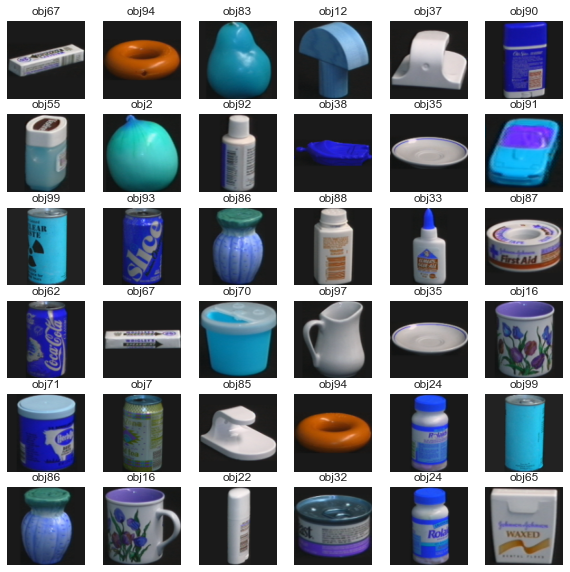

In [34]:
plt.figure(figsize=(10,10))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))


In [ ]:
#roc curve for ann select thershold one vs rest
from sklearn.metrics import roc_curve,auc
fpr_sum = np.zeros(3)
tpr_sum = np.zeros(3)
for class_num in range(y_pred.shape[1]):
    predications = []
    true_labels = []
    for i in range(y_pred.shape[0]):
        if(np.argmax(y_pred[i]) == class_num):
            predications.append(1)
        else:
            predications.append(0)

        if(y_test[i] == class_num):
             true_labels.append(1)
        else:
            true_labels.append(0)

    predications = np.array(predications)
    true_labels = np.array(true_labels)
    fpr,tpr,thershold = roc_curve(true_labels,predications)
    fpr_sum += fpr
    tpr_sum += tpr

fpr = fpr_sum / y_pred.shape[1]
tpr = tpr_sum / y_pred.shape[1]

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

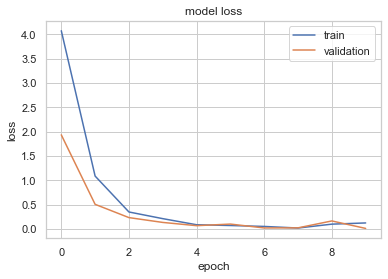

In [33]:
#loss for Ann
plt.plot(k.history['loss'])
plt.plot(k.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

C:\Users\kholo\AppData\Local\Temp\ipykernel_7896\3164092441.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


[[34  0  0 ...  0  0  0]
 [ 0 10 26 ...  0  0  0]
 [ 0  0 36 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  0  0 ...  0  0 10]]


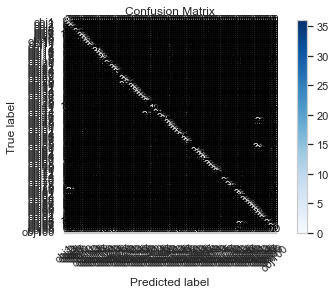

In [35]:
#ann confusion_matrix
pred=model.predict(x=X_test,batch_size=10,verbose=0)
for i in pred:
    #print(i)
    rounded_pred=np.argmax(pred,axis=-1)
for i in rounded_pred:
#   print(i)
      test_label=[]
for k,v in code.items():
    test_label.append(k)
    
#print(test_label)
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
       # print('Confusion matrix, without normalization')
         print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_true=y_test,y_pred=rounded_pred)
plot_confusion_matrix(cm=cm,classes=test_label,title='Confusion Matrix')

In [92]:
# svm model
from sklearn.svm import SVC
SVC(C=3,                         
    kernel='rbf',                   
    degree=3,                       
    gamma=0.01,                  
    coef0=0.0,                      
    shrinking=True,                 
    probability=False,              
    tol=0.001,                      
    cache_size=200,                 
    class_weight=None,              
    verbose=False,                  
    max_iter=- 1,                   
    decision_function_shape='ovr',  
    break_ties=False,               
    random_state=None)
medol = SVC(kernel='linear',gamma=0.01,C=3)
medol=medol.fit(d2_train_dataset, y_train)


In [93]:
#prediction

y_pred=medol.predict(d2_test_dataset)
print(y_pred.shape)

(3600,)


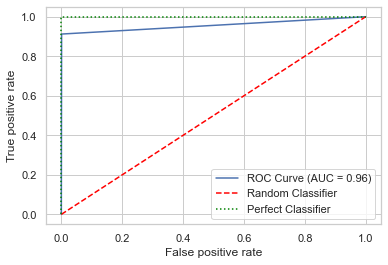

In [97]:
#roc curve for svm
from sklearn.metrics import roc_curve,auc
fpr_sum = np.zeros(3)
tpr_sum = np.zeros(3)
for class_num in range(100):
    predications = []
    true_labels = []
    for i in range(3600):
        if(y_pred[i] == class_num):
            predications.append(1)
        else:
            predications.append(0)

        if(y_test[i] == class_num):
               true_labels.append(1)
        else:
             true_labels.append(0)

    predications = np.array(predications)
    true_labels = np.array(true_labels)
    fpr,tpr,_ = roc_curve(true_labels,predications)
    fpr_sum += fpr
    tpr_sum += tpr

fpr = fpr_sum / 100
tpr = tpr_sum / 100

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [40]:
prediction.shape

(3600,)

In [45]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
prediction[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score
print("Accuracy",accuracy_score(y_test, prediction))

Accuracy 0.9122222222222223


In [69]:
#SVM confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , prediction)
print(cm)

[[36  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 36 ...  0  0  0]
 ...
 [ 0  0  0 ... 17  0  0]
 [ 0  0  0 ...  0 36  0]
 [ 0  0  0 ...  0  0  6]]


In [70]:
#loss for svm
import numpy as np
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
train_sizes, train_scores, valid_scores = learning_curve(
medol, d2_train_dataset,y_train, train_sizes=[50, 80, 100])

In [59]:
print( scores.mean() )

0.848210022202626


In [71]:
train_sizes


array([ 50,  80, 100])

In [72]:
train_scores

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [73]:
valid_scores

array([[0.01978892, 0.02110818, 0.02110818, 0.02113606, 0.01585205],
       [0.03166227, 0.03166227, 0.03034301, 0.03038309, 0.03038309],
       [0.0408971 , 0.0408971 , 0.03825858, 0.03963012, 0.0330251 ]])

In [74]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

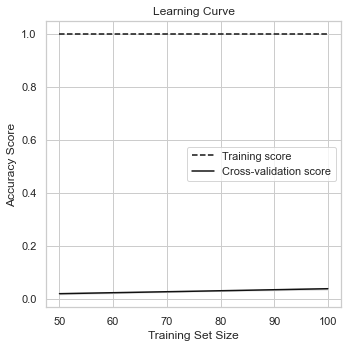

In [75]:
plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()